# Use PCA to reduce the dimensionality of our dataset to enable better similarity ratings

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
tfidf_df = pd.read_pickle('Pickles/tfidf_df.pkl')
director_df = pd.read_pickle('Pickles/director_df.pkl')
genre_df = pd.read_pickle('Pickles/genre_df.pkl')
actor_df = pd.read_pickle('Pickles/actor_df.pkl')


tfidf_df.shape, director_df.shape, genre_df.shape, actor_df.shape

((1343, 5801), (1343, 282), (1343, 24), (1343, 3101))

In [3]:
len(tfidf_df.movieId.unique())

1343

In [5]:
df = pd.merge(tfidf_df, genre_df, on='movieId', how='outer')
df = pd.merge(df, director_df, on='movieId', how='outer')
df = pd.merge(df, actor_df, on='movieId', how='outer')


df.shape

(1343, 9205)

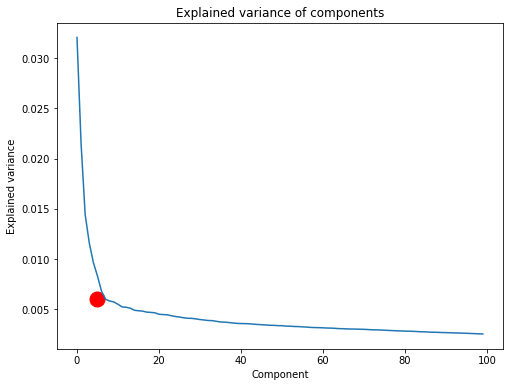

In [85]:
from sklearn.decomposition import PCA

movieIds = df['movieId']
temp = df.loc[:, df.columns != 'movieId']

p=100
pca = PCA(n_components=p).fit(temp.T) # fit PCA on all our features

pca_df = pd.DataFrame(pca.components_.T) # create df from components


plt.figure(figsize=(8,6))
plt.title("Explained variance of components")
plt.ylabel("Explained variance")
plt.xlabel("Component")
plt.plot([5], [.006], marker='o', markersize=15, color="red")
plt.plot(np.arange(p), pca.explained_variance_)

In [86]:
pca.explained_variance_

array([0.03206516, 0.02147339, 0.01441228, 0.01159333, 0.00964158,
       0.00829724, 0.00677789, 0.00598362, 0.00581649, 0.00572331,
       0.00549506, 0.00523039, 0.00519199, 0.00510771, 0.0048983 ,
       0.00484879, 0.00481116, 0.00471147, 0.00468512, 0.00464401,
       0.00450136, 0.00446894, 0.00444723, 0.00435339, 0.00427625,
       0.00422168, 0.00415078, 0.00410129, 0.00408919, 0.00403815,
       0.00397261, 0.00392904, 0.00387797, 0.00386331, 0.00379741,
       0.00373318, 0.00371599, 0.00367749, 0.00363195, 0.00359178,
       0.00357363, 0.00356804, 0.0035511 , 0.0035128 , 0.00348298,
       0.00346119, 0.00343332, 0.00340428, 0.00339439, 0.00336708,
       0.00336314, 0.0033169 , 0.0033088 , 0.00328122, 0.00327249,
       0.00324443, 0.00322217, 0.00319045, 0.00317286, 0.00316584,
       0.00314803, 0.00312884, 0.00311816, 0.00309568, 0.0030666 ,
       0.00305947, 0.00303696, 0.00302783, 0.00302135, 0.00300754,
       0.00299856, 0.00297614, 0.0029513 , 0.00294514, 0.00293

In [96]:
# write this dataframe to a pickle
temp = pca_df.copy()
temp.columns = temp.columns.astype(str)
temp['movieId'] = movieIds
temp.to_pickle('Pickles/pca_100_df.pkl')

pca_df.shape

(1343, 100)

In [88]:
cos_sim_matrix = cosine_similarity(pca_df, pca_df) # create similarity matrix from df
cos_sim_matrix.shape

(1343, 1343)

In [94]:
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns = movieIds) # create new df from our similarity matrix
cos_sim_df['movieId'] = movieIds
cos_sim_df.to_pickle('Pickles/cos_sim_df.pkl')

# Show most similar movies to any given movie using components

In [90]:
def display_top_movies(movie_title, n_movies, similarity_matrix_df):
    
    ordered_index_series = similarity_matrix_df[movie_title].sort_values(ascending=False) # access the movie's column and sort the values in it
    
    top_series = ordered_index_series[1:n_movies+1] # remove the first value, it is the similarity to itself (1)
    
    print("Selected Movie Id: ",movie_title, '\n--------------------')
    print("MovieId   Similarity")
    for i,v in top_series.items(): # iterate through items in series, print movie title and similarity to our chosen movie
        print((similarity_matrix_df.iloc[i]['movieId']),' :', round(v, 4))
#         .ljust(40,' '), ' :', round(v, 4)

In [91]:
display_top_movies(movie_title = 1,
                   n_movies = 15,
                   similarity_matrix_df = cos_sim_df)

Selected Movie Id:  1 
--------------------
MovieId   Similarity
3114.0  : 0.9793
78499.0  : 0.9594
95167.0  : 0.3866
60069.0  : 0.3625
50872.0  : 0.3567
4022.0  : 0.3447
8961.0  : 0.342
45517.0  : 0.3408
2369.0  : 0.3358
2145.0  : 0.3228
356.0  : 0.3226
68954.0  : 0.2866
317.0  : 0.2794
2797.0  : 0.2758
3255.0  : 0.2703


In [92]:
display_top_movies(movie_title = 8368,
                   n_movies = 15,
                   similarity_matrix_df = cos_sim_df)

Selected Movie Id:  8368 
--------------------
MovieId   Similarity
5816.0  : 0.8755
54001.0  : 0.8592
4896.0  : 0.8065
81834.0  : 0.7295
40815.0  : 0.7042
69844.0  : 0.5087
88125.0  : 0.4978
33004.0  : 0.3742
73321.0  : 0.3434
293.0  : 0.3303
1185.0  : 0.3217
1831.0  : 0.292
3967.0  : 0.2886
3869.0  : 0.2765
546.0  : 0.2736


In [93]:
display_top_movies(movie_title = 8376,
                   n_movies = 15,
                   similarity_matrix_df = cos_sim_df)

Selected Movie Id:  8376 
--------------------
MovieId   Similarity
48385.0  : 0.918
2378.0  : 0.8333
2359.0  : 0.8236
3785.0  : 0.7121
7451.0  : 0.6921
750.0  : 0.6831
585.0  : 0.6789
65.0  : 0.6657
2502.0  : 0.662
441.0  : 0.5915
2791.0  : 0.5904
2109.0  : 0.582
1513.0  : 0.5764
162.0  : 0.5642
562.0  : 0.5637
